In [1]:
import os
import cv2
import winsound
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
from tqdm import tqdm

In [2]:
def play_sound(duration, freq):
    winsound.Beep(freq, duration)

def change_day_to_night(image, value):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_night = img * np.array(value)
    img_night = (255 * img_night / img_night.max()).astype(np.uint8)
    img_night = cv2.cvtColor(img_night, cv2.COLOR_RGB2BGR)
    return img_night

def adjust_contrast_brightness(image, contrast, brightness):
    brightness += int(round(255*(1-contrast)/2))
    image = cv2.addWeighted(image, contrast, image, 0, brightness)
    return image

def adjust_saturation(image, saturation):
    img = Image.fromarray(image).convert("RGB")
    filter = ImageEnhance.Color(img)
    img = filter.enhance(saturation)
    img = np.array(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    return img

def adjust_vignette(image, x_value, y_value):
    rows, cols = image.shape[:2]
    X_resultant_kernel = cv2.getGaussianKernel(cols,x_value)
    Y_resultant_kernel = cv2.getGaussianKernel(rows,y_value)
    resultant_kernel = Y_resultant_kernel * X_resultant_kernel.T
    mask = 255 * resultant_kernel / np.linalg.norm(resultant_kernel)
    for i in range(3):
        image[:,:,i] = image[:,:,i] * mask
    return image

def adjust_sharpen(image, value):
    img = Image.fromarray(image).convert("RGB")
    filter = ImageEnhance.Sharpness(img)
    img = filter.enhance(value)
    img = np.array(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    return img

def filter_image_totally(image_path):
    image = cv2.imread(image_path)
    new_image = adjust_contrast_brightness(image, 1, -70)
    new_image = adjust_vignette(new_image, 9000, 270)
    new_image = adjust_saturation(new_image, 3)
    new_image = adjust_sharpen(new_image, 2)
    new_image = change_day_to_night(new_image, [0.1, 0.2, 0.7])
    new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
    return new_image

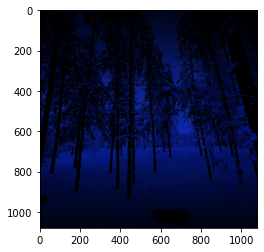

In [3]:
image_path = "./dataset/day/0c9c086d35d54492b329aeb08263cbab.jpg"
img = filter_image_totally(image_path)

plt.imshow(img)

In [4]:
dir_img_night_path = "./dataset/night/"
dir_image_day_path = "./dataset/day/"

In [5]:
all_images_day_image = os.listdir(dir_image_day_path)

for image in tqdm(all_images_day_image):
    change_image_day_to_night = filter_image_totally(os.path.join(dir_image_day_path, image))
    plt.imsave(os.path.join(dir_img_night_path, image), change_image_day_to_night)
    
play_sound(2000, 500)

100%|██████████| 8874/8874 [39:14<00:00,  3.77it/s]  
